# Dry Bean Dataset Analysis

# TODO
-> For supervised learning problems, the idea is to learn how to classify examples in terms ofthe concept under analysis. An initial exploratory data analysis should be carried out (class distribution, values per attribute, and so on). Different learning algorithms should be employed and compared using appropriate evaluation metrics (performance during learning, confusion matrix, precision, recall, accuracy, F1measure) and the time spent to train/test the models

                |

                v
                
AKA mais exploratory data analysis

-> Deve remover-se outliers?

-> Dataset unbalanced (mais dados de certas classes) - possivel de melhorar?

-> Anova preprocessing???????? -> Neste momento estamos a retirar features baseado na correlation matrix

-> Na funcção run fazer com que todos os parametros exceto a confusion matrix provavelmente sejam acumulados e mostrados em histogramas e nao apenas da ultima run. Depois adicionar isso ao knn e svm e decision tree

-> Fazer Naive Bayes and Random Forest

-> Fazer GridSearch para melhorar parametros (Mais ou menos feito)


# Packages used
* sklearn
* pandas
* seaborn
* matplotlib

# Importing the dataset

In [2]:
import pandas as pd

bean_data = pd.read_excel("../input/Dry_Bean_Dataset.xls")
bean_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
bean_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


First we check for missing data:

In [4]:
bean_data.isnull().any().sum()

0

No missing values were found. Next we create a plot of the dataset with a color for each class:

In [5]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
# sb.pairplot(bean_data.sample(100), hue='Class')
# ;

![Big plot](out.png)

## Checking for the amount of each bean in the dataset

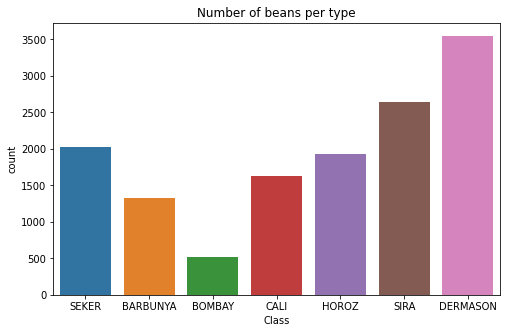

In [6]:
plt.figure(figsize = (8, 5))

sb.countplot(x = bean_data["Class"])
plt.title("Number of beans per type")
plt.show()

# Violion Plots

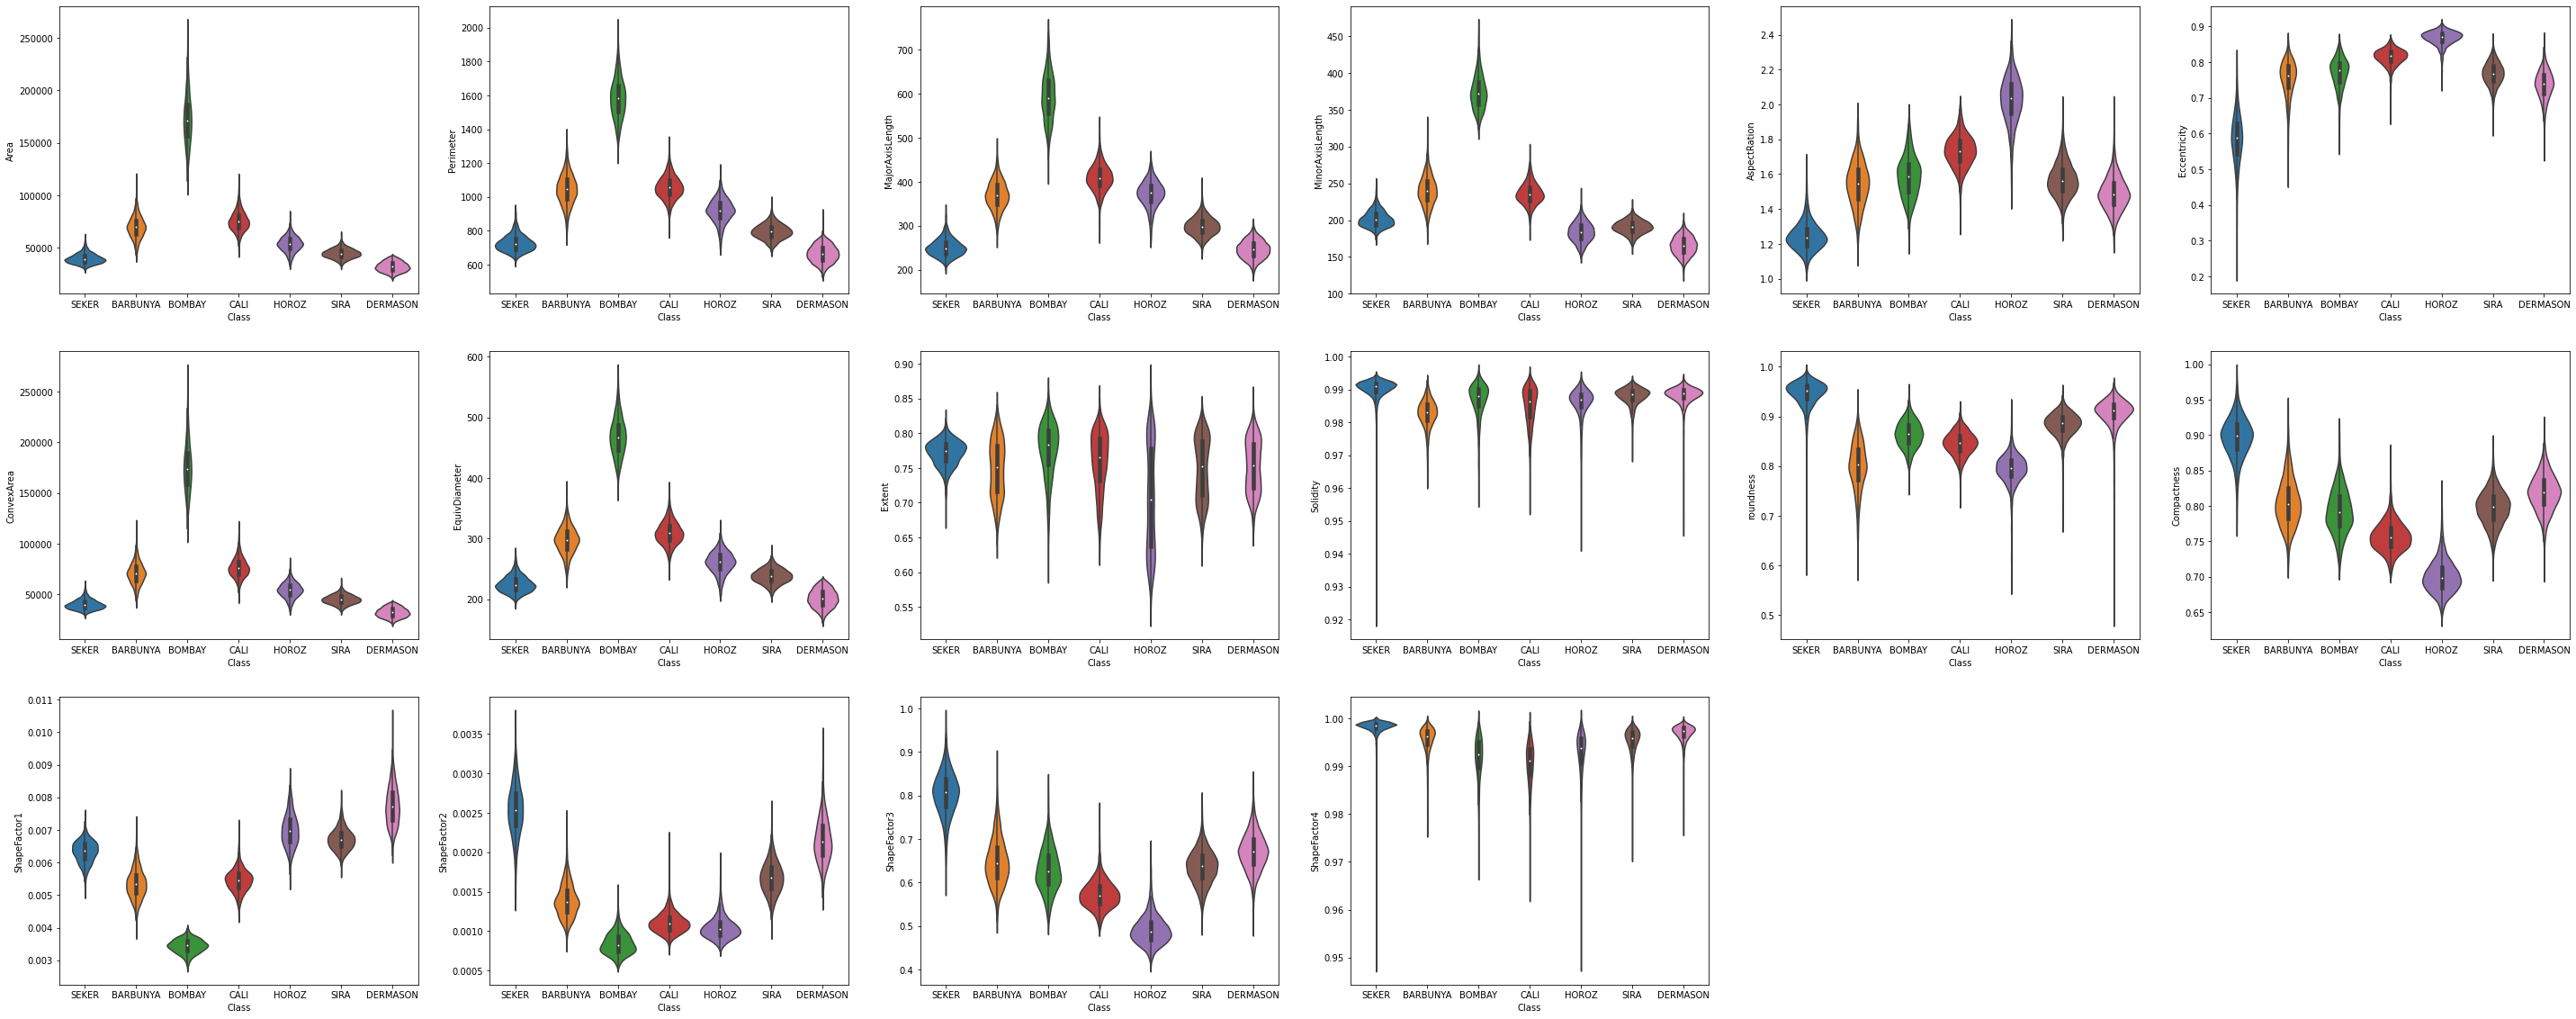

In [7]:
plt.figure(figsize=(50, 20))

for column_index, column in enumerate(bean_data.columns):
    if column == 'Class':
        continue
    plt.subplot(3, 6, column_index + 1)
    sb.violinplot(x='Class', y=column, data=bean_data)

(Still don't know what to do with this)


Our next step is to create a correlation matrix to compare how each feautre correlates to eachother and to the Class label. For that we need to encode the Class label so that the correlation can be calculated. 

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(bean_data['Class'])
bean_data['Class'] = le.transform(bean_data['Class'])

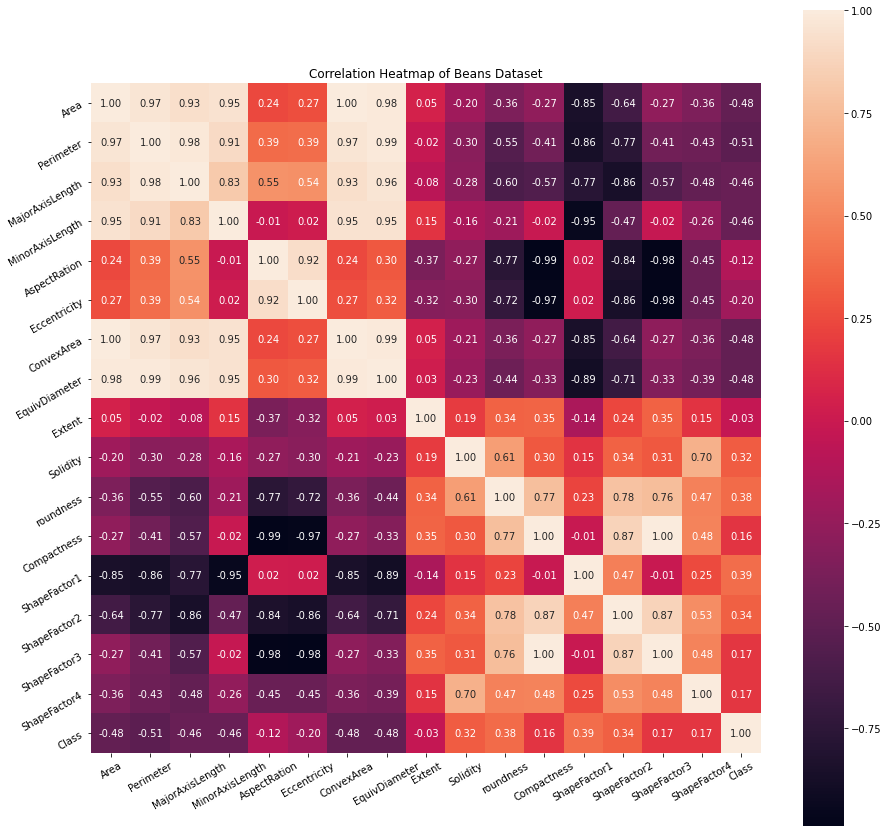

In [9]:
corr_matrix = bean_data.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sb.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()   

From this correlation matrix we can exctract features that are strongly correlated with eachother. Since we have a mirrored matrix the analysis can be done by just exctracting the upper matrix triangle and searching for values with an absolute value of more than 0.9 which is our criteria for correlated features.   

The first set of features correlated are:
* Area
* Perimeter
* MajorAxisLength
* MinorAxisLength
* ConvexArea
* EquivDiameter
* ShapeFactor1 -> even though this feature only has high correlation(>0.9) with MinorAxisLength it presents >0.85 correlation with all other features here presented so we'll include it here


The feature to remove is the one that presents the highest correlation with the Class label which in this case is the **Perimeter**.

The second set of correlated features are:
* ShapeFactor3
* Compactness
* Eccentricity
* AspectRation

From this set of features the retained one is **Eccentricity**.

So the following features will be dropped:
* ShapeFactor3
* Compactness
* AspectRation
* Area
* MajorAxisLength
* MinorAxisLength
* ConvexArea
* EquivDiameter
* ShapeFactor1

In [10]:
bean_data = bean_data.drop(['ShapeFactor3', 
                            'Compactness',
                            'AspectRation',
                            'Area',
                            'MajorAxisLength',
                            'MinorAxisLength',
                            'ConvexArea',
                            'EquivDiameter',
                            'ShapeFactor1'], axis = 1)

bean_data.head()

,Perimeter,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,Class
0,610.291,0.549812,0.763923,0.988856,0.958027,0.003147,0.998724,5
1,638.018,0.411785,0.783968,0.984986,0.887034,0.003564,0.998430,5
2,624.110,0.562727,0.778113,0.989559,0.947849,0.003048,0.999066,5
3,645.884,0.498616,0.782681,0.976696,0.903936,0.003215,0.994199,5
4,620.134,0.333680,0.773098,0.990893,0.984877,0.003665,0.999166,5


In [11]:
X = bean_data.drop('Class', axis=1).values
y = bean_data['Class'].values

X[5:]

array([[6.34927000e+02, 5.20400660e-01, 7.75688485e-01, ...,
        9.43851783e-01, 3.15277874e-03, 9.99235781e-01],
       [6.70033000e+02, 4.89477894e-01, 7.62401501e-01, ...,
        8.53079869e-01, 3.24201625e-03, 9.99048736e-01],
       [6.29727000e+02, 5.13759558e-01, 7.70681818e-01, ...,
        9.67109244e-01, 3.15828515e-03, 9.98344560e-01],
       ...,
       [7.59321000e+02, 7.34064781e-01, 7.29932444e-01, ...,
        9.18424091e-01, 1.88827064e-03, 9.96767264e-01],
       [7.63779000e+02, 7.41054787e-01, 7.05389121e-01, ...,
        9.07906457e-01, 1.85202548e-03, 9.95222420e-01],
       [7.72237000e+02, 7.86693016e-01, 7.88962497e-01, ...,
        8.88380369e-01, 1.63981171e-03, 9.98179623e-01]])

# Running the model
## Auxiliary function to run a model a set number of iterations

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model_accuracies = []

def run_model(model_instance, num_iterations=1000, test_size=0.25, scaler=None):

    for repetition in range(num_iterations):
        (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=test_size)

        if scaler != None:
            scaler = scaler.fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

        model_instance.fit(X_train, y_train)
        classifier_accuracy = model_instance.score(X_test, y_test)
        model_accuracies.append(classifier_accuracy)
        y_pred = model_instance.predict(X_test)
    else:
        print(accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))

    plt.hist(model_accuracies)
    ;

# Cross validation and parameter tuning
## Auxiliary function to perform parameter tuning with cross validation

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

def tune_model(model_instance, parameter_grid, cross_validation=StratifiedKFold(n_splits=10), scaler=None): 
    global X, y

    grid_search = GridSearchCV(model_instance,
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            verbose=2)
    if scaler != None:
        scaler = scaler.fit(X)
        X = scaler.transform(X)

    grid_search.fit(X, y)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

    grid_search.best_estimator_

# Decision Tree Classifier

0.8947987070232148
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       309
           1       0.98      0.99      0.98       126
           2       0.93      0.93      0.93       397
           3       0.88      0.88      0.88       889
           4       0.93      0.94      0.93       481
           5       0.95      0.90      0.92       512
           6       0.82      0.83      0.83       689

    accuracy                           0.89      3403
   macro avg       0.91      0.91      0.91      3403
weighted avg       0.90      0.89      0.89      3403

[[286   2  10   1   4   2   4]
 [  1 125   0   0   0   0   0]
 [ 16   1 369   0   6   1   4]
 [  0   0   0 780   6  18  85]
 [  3   0   9   2 450   0  17]
 [  6   0   1  27   1 460  17]
 [  6   0   7  81  15   5 575]]


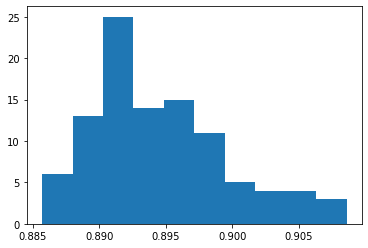

In [15]:
from sklearn.tree import DecisionTreeClassifier

run_model(DecisionTreeClassifier(), 100)

In [16]:
parameter_grid = {'criterion': ['gini', 'entropy'],
                    'splitter': ['best', 'random'],
                    'max_depth': range(1, 7),
                    'max_features': range(1, 7)}

tune_model(DecisionTreeClassifier(), parameter_grid)

] END criterion=entropy, max_depth=5, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=2, splitter=random; total time=

# SVM

The SVM algorithm expects the data to be standardized, so we use the Sklearn StandardScaler to standardize our data. If this is not performed prior to training the model, the efficiency will be all over the place.

In [27]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler

0.926829268292683
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       362
           1       1.00      1.00      1.00       127
           2       0.94      0.94      0.94       421
           3       0.90      0.94      0.92       862
           4       0.95      0.96      0.96       482
           5       0.94      0.96      0.95       513
           6       0.88      0.85      0.87       636

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403

[[326   0  19   0   1   5  11]
 [  0 127   0   0   0   0   0]
 [  6   0 397   0  13   0   5]
 [  0   0   0 807   0  17  38]
 [  1   0   6   4 462   0   9]
 [  3   0   0   7   0 495   8]
 [  1   0   2  75   9   9 540]]


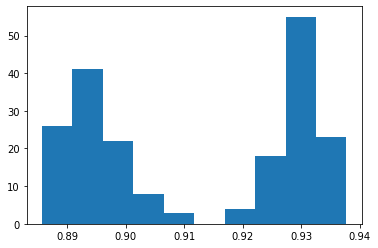

In [18]:
run_model(SVC(), 100, scaler=StandardScaler())

Text(0.5, 1.0, 'Average score: 0.5971857632538914')

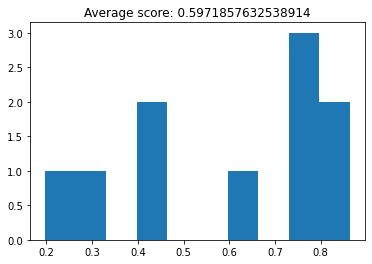

In [19]:
# Without standardizing the data:
svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Text(0.5, 1.0, 'Average score: 0.902887873971911')

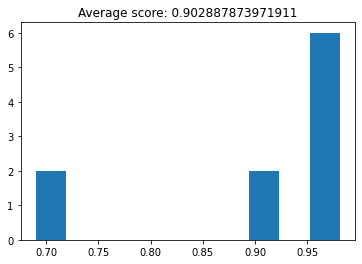

In [20]:
# Standardizing the data:
scaler = StandardScaler().fit(X)
standardized_X = scaler.transform(X)

svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

By comparing both histograms, it can be easily concluded that the standardization is really necessary and produces better and more consistent results.

Still the cross validation scores vary a lot based on the training data chosen. Therefore we should do some parameter tuning to see what the best parameters are for our dataset that don't overfit the data. This can be achieved by a GridSearch. This will be addressed below. 


In [21]:
parameter_grid = {'C': [1, 10, 100, 1000], 
                    'gamma': [0.001, 0.0001],
                    'kernel': ['linear', 'poly', 'rbf']}

tune_model(SVC(), parameter_grid)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


# K-nearest neighbours (KNN)
Just like the SVM model, the KNN model also requires the data to be standardised.

''

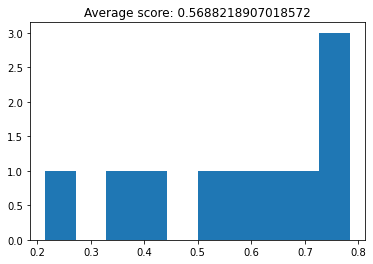

In [28]:
# Without standardizing the data
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(knn, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

Without standardizing the data the results are simply bad.

''

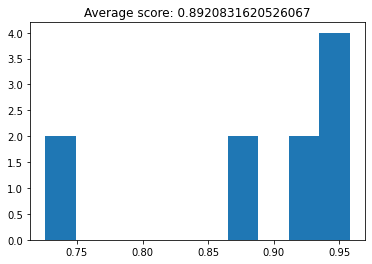

In [29]:
# Standardizing the data
scaler = StandardScaler().fit(X)
standardized_X = scaler.transform(X)

knn = neighbors.KNeighborsClassifier()

cv_scores = cross_val_score(knn, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

Now we can run the model some times to see its efficiency with the default parameters:

0.9086100499559212
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       337
           1       1.00      1.00      1.00       127
           2       0.92      0.93      0.92       413
           3       0.88      0.91      0.90       879
           4       0.93      0.95      0.94       473
           5       0.96      0.92      0.94       503
           6       0.85      0.84      0.85       671

    accuracy                           0.91      3403
   macro avg       0.93      0.92      0.92      3403
weighted avg       0.91      0.91      0.91      3403

[[307   0  18   0   2   2   8]
 [  0 127   0   0   0   0   0]
 [  7   0 383   0  17   2   4]
 [  1   0   0 798   1  11  68]
 [  1   0  10   2 449   0  11]
 [  2   0   0  28   1 463   9]
 [  8   0   6  76  11   5 565]]


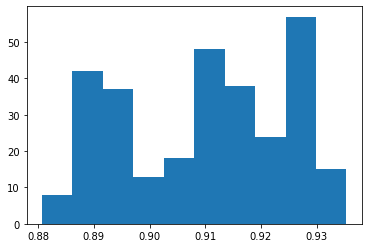

In [30]:
knn = neighbors.KNeighborsClassifier(n_jobs=-1)

run_model(knn, 100, scaler=StandardScaler())

In [35]:
parameter_grid =  {'n_neighbors':[4,5,6,7,10,15],
                    'leaf_size':[5, 10, 15, 20, 50, 100],
                    'n_jobs':[-1],
                    'algorithm':['auto']}

knn = neighbors.KNeighborsClassifier()
tune_model(knn, parameter_grid, scaler=StandardScaler())

s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=4; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_jobs=-1, n_neighbors=5; total tim

# Naive Bayes

0.8936232735821334
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       340
           1       0.99      1.00      1.00       130
           2       0.85      0.90      0.88       412
           3       0.91      0.88      0.89       874
           4       0.94      0.94      0.94       486
           5       0.92      0.94      0.93       516
           6       0.83      0.86      0.84       645

    accuracy                           0.89      3403
   macro avg       0.91      0.91      0.90      3403
weighted avg       0.89      0.89      0.89      3403

[[281   0  45   0   1   2  11]
 [  0 130   0   0   0   0   0]
 [ 18   1 371   0  13   0   9]
 [  6   0   0 765   4  30  69]
 [  1   0  16   1 456   0  12]
 [  4   0   0  14   0 483  15]
 [  4   0   3  61  13   9 555]]


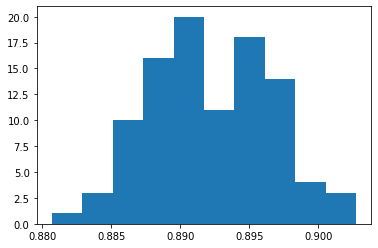

In [14]:
from sklearn.naive_bayes import GaussianNB

run_model(GaussianNB(), 100)

In [16]:
parameter_grid = {}

tune_model(GaussianNB(), parameter_grid)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Best score: 0.8749654471478927
Best parameters: {}


# Random Forest Classifier

0.9238906846899795
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       347
           1       1.00      1.00      1.00       138
           2       0.96      0.94      0.95       411
           3       0.90      0.93      0.91       906
           4       0.97      0.95      0.96       474
           5       0.95      0.94      0.95       482
           6       0.87      0.85      0.86       645

    accuracy                           0.92      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.92      0.92      0.92      3403

[[324   0   9   1   1   2  10]
 [  0 138   0   0   0   0   0]
 [ 15   0 385   0   8   0   3]
 [  0   0   0 843   1  18  44]
 [  2   0   6   3 451   0  12]
 [  4   0   1  10   0 454  13]
 [  2   0   2  83   6   3 549]]


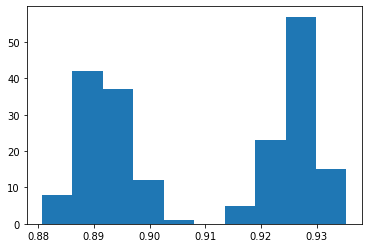

In [17]:
from sklearn.ensemble import RandomForestClassifier

run_model(RandomForestClassifier(), 100)

In [24]:
parameter_grid = {
    'n_estimators': [100,200],
    'max_depth': [8, 9, 10],
    'n_jobs': [-1], #Makes it faster
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}

tune_model(RandomForestClassifier(), parameter_grid)

erion=gini, max_depth=9, max_features=auto, n_estimators=200, n_jobs=-1; total time=   0.4s
[CV] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200, n_jobs=-1; total time=   0.4s
[CV] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200, n_jobs=-1; total time=   0.4s
[CV] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200, n_jobs=-1; total time=   0.4s
[CV] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200, n_jobs=-1; total time=   0.4s
[CV] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=100, n_jobs=-1; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=100, n_jobs=-1; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=100, n_jobs=-1; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=sqrt, n_estimator

# Comparing Models

# Conclusion